
## **22p21c0039-Natchapol**

# 0. เขียนโปรแกรมหาค่าสูงสุดในลิสต์

In [ ]:
def listMaxValue(targetList):
  maxValue = 0
  for item in targetList:
    if item > maxValue:
      maxValue = item
  return maxValue

targetList = [10,20,13,4,57,2,1,16,22,31]
print("Max value is :", listMaxValue(targetList))

Max value is : 57


# 1. เขียน 8 puzzle

In [1]:
import random
import copy

def win(puzzle, goal):
  return goal == puzzle

def find(puzzle,t):
    for i in range(len(puzzle)):
      for j in range(len(puzzle[i])):
        if t == puzzle[i][j]:
          return i,j

def fScore(puzzle,goal):
  init = copy.deepcopy(puzzle)
  count = 0
  for i in range(len(puzzle)):
    for j in range(len(puzzle[i])):
      if puzzle[i][j] == 0:
        continue
      if puzzle[i][j] != init[i][j]:
        count += 1  
      k,l = find(goal,puzzle[i][j])
      count += abs(k-i) + abs(l-j)
  return count 

def genOp(puzzle):
  ops = []
  i,j = find(puzzle,0)
  for p in [(-1,0),(+1,0),(0,-1),(0,+1)]:
    if not ((i+p[0] > 2) or (i+p[0] < 0) or (j+p[1] > 2) or (j+p[1] < 0)):
      ops.append([i+p[0],j+p[1]])
  return ops

def swap0(puzzles,pos):
  puzzle = copy.deepcopy(puzzles)
  i,j = find(puzzle,0)
  puzzle[i][j] = puzzle[pos[0]][pos[1]]
  puzzle[pos[0]][pos[1]] = 0
  return puzzle

def shuffle(puzzle, times):

  for i in range(times):
    o = genOp(puzzle)
    k = random.randint(0,len(o)-1)
    puzzle = swap0(puzzle,o[k])
  return puzzle
  
def solve(puzzles, goal):
  lastList = []
  puzzle = copy.deepcopy(puzzles)
  last = find(puzzle,0)
  while not win(puzzle,goal):
    ops = genOp(puzzle)
    ops = [ops[i] for i in range(len(ops)) if list(ops[i]) != list(last)]
    less = swap0(puzzle, ops[0])
    for i,v in enumerate(ops):
      if fScore(swap0(puzzle, v),goal) < fScore(less,goal):
        less = swap0(puzzle, v)
    last = find(puzzle,0)
    puzzle = less
    lastList.append(puzzle)
  return lastList

In [2]:
goal = [[1,2,3],
        [8,0,4],
        [7,6,5]]

pb =  shuffle(goal,20)
print("Target-----")
for i in goal:
  print(i)
print("-----------")
print("initial----")
for i in pb:
  print(i)
print("-----------\n\n")
lastList = solve(pb, goal)

for i in lastList[0]:
  print(i)
for i in lastList[1:]:
  print("    |")
  print("    V")
  for j in i:
    print(j)


Target-----
[1, 2, 3]
[8, 0, 4]
[7, 6, 5]
-----------
initial----
[1, 3, 4]
[8, 2, 5]
[7, 6, 0]
-----------


[1, 3, 4]
[8, 2, 0]
[7, 6, 5]
    |
    V
[1, 3, 0]
[8, 2, 4]
[7, 6, 5]
    |
    V
[1, 0, 3]
[8, 2, 4]
[7, 6, 5]
    |
    V
[1, 2, 3]
[8, 0, 4]
[7, 6, 5]


# 2. เขียน depth-first search พร้อม อะนิเมชั่น

https://www.kaggle.com/natchapolpatamawisut/super-ai-dfs

# 3. เลือกข้อมูล 1 อย่างจาก Kaggle มาทำการ visualize ข้อมูลในรูปแบบกราฟต่างๆ

In [ ]:
!gdown --id 1ecZtwAfx7fo715irc0XaG6FSBXx2VDwp

Downloading...
From: https://drive.google.com/uc?id=1ecZtwAfx7fo715irc0XaG6FSBXx2VDwp
To: /content/StudentsPerformance.csv
100% 72.0k/72.0k [00:00<00:00, 25.9MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.groupby("race/ethnicity")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


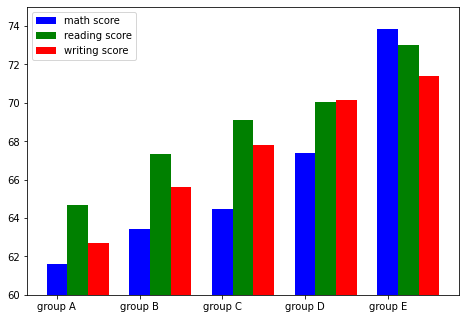

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = df.groupby("race/ethnicity")[["math score","reading score","writing score"]].mean()
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, list(data["math score"]), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(data["reading score"]), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(data["writing score"]), color = 'r', width = 0.25)
a = list(data.index)
ax.set_xticklabels([1] + a)
plt.ylim(60,75)
plt.legend(['math score','reading score','writing score']);

In [ ]:
a = df.groupby("gender")[["math score","reading score","writing score"]].mean()
a

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


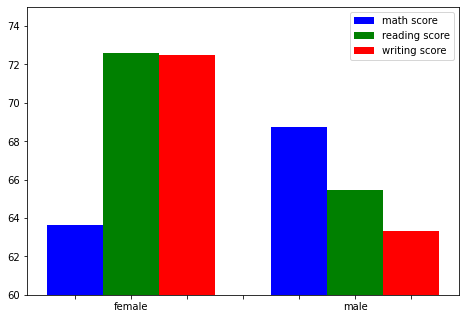

In [ ]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
data = df.groupby("gender")[["math score","reading score","writing score"]].mean()
ax.bar(X + 0.00, list(data["math score"]), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(data["reading score"]), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(data["writing score"]), color = 'r', width = 0.25)
a = list(data.index)
a.insert(1,"")
a.insert(1,"")
a.insert(1,"")
ax.set_xticklabels(["",""] + a)
plt.ylim(60,75)
plt.legend(['math score','reading score','writing score']);

In [ ]:
a = df.groupby("parental level of education")[["math score","reading score","writing score"]].mean()
a

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


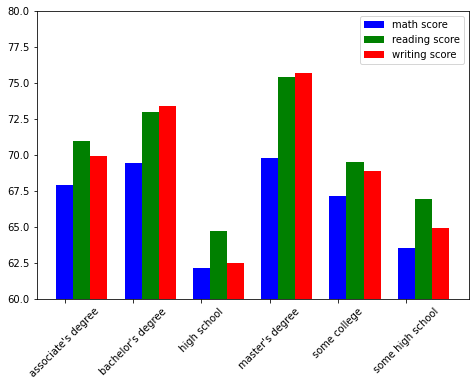

In [ ]:
data = df.groupby("parental level of education")[["math score","reading score","writing score"]].mean()
X = np.arange(6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, list(data["math score"]), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(data["reading score"]), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(data["writing score"]), color = 'r', width = 0.25)
a = list(data.index)
ax.set_xticklabels([1] + a,rotation=45)
plt.ylim(60,80)
plt.legend(['math score','reading score','writing score']);

In [ ]:
a = df.groupby("lunch")[["math score","reading score","writing score"]].mean()
a

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


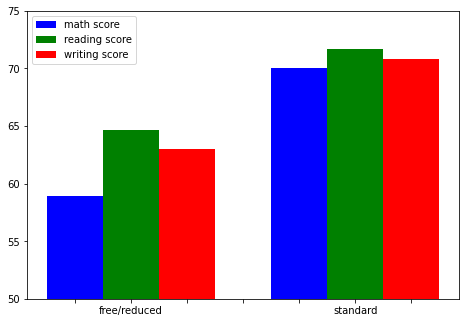

In [ ]:
data = df.groupby("lunch")[["math score","reading score","writing score"]].mean()
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, list(data["math score"]), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(data["reading score"]), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(data["writing score"]), color = 'r', width = 0.25)
a = list(data.index)
a.insert(1,"")
a.insert(1,"")
a.insert(1,"")
ax.set_xticklabels(["",""] + a)
plt.ylim(50,75)
plt.legend(['math score','reading score','writing score']);

In [ ]:
a = df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()
a

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


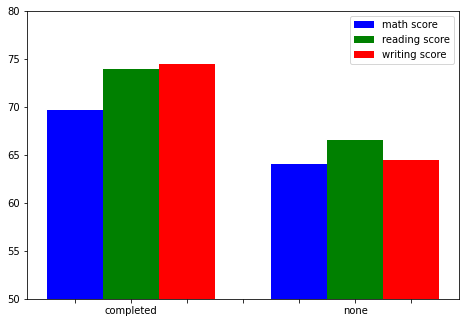

In [ ]:
data = df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, list(data["math score"]), color = 'b', width = 0.25)
ax.bar(X + 0.25, list(data["reading score"]), color = 'g', width = 0.25)
ax.bar(X + 0.50, list(data["writing score"]), color = 'r', width = 0.25)
a = list(data.index)
a.insert(1,"")
a.insert(1,"")
a.insert(1,"")
ax.set_xticklabels(["",""] + a)
plt.ylim(50,80)
plt.legend(['math score','reading score','writing score']);